 # AI Community @ Семинар № 5
 ## Уменьшение размерности с PCA

### Немного линейной алгебры

Возьмем матрицу $\begin{bmatrix} 1 & 2 \\ 2 & 1 \end{bmatrix}$.  
$\textit{Дальше будет рисование на доске.}$

In [23]:
import numpy as np
from scipy import linalg as sla
import matplotlib.pyplot as plt
%matplotlib inline

Посмотрим еще раз на матрицу, которую исследовали на доске:

In [162]:
X = np.array([[1, 2], [2, 1]])
cov_matrix = np.cov(X)

Применим `SVD-разложение`:

In [163]:
U, S, V = sla.svd(cov_matrix)

Посмотрим на матрицу собственных векторов:

In [164]:
U*np.sqrt(2)

array([[-1.,  1.],
       [ 1.,  1.]])

**Полезные ссылки:**  
Собственные вектора и собственные значения:  
[Eigenvectors and Eigenvalues: Explained visually](http://setosa.io/ev/eigenvectors-and-eigenvalues/)  
[Wiki](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors)  
[Очень хороший ответ на CrossValidated](https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues)

SVD-разложение:  
[Wiki](https://en.wikipedia.org/wiki/Singular-value_decomposition)  
[MIT](http://web.mit.edu/be.400/www/SVD/Singular_Value_Decomposition.htm)

### PCA - Principal Component Analysis, Метод главных компонент

**Полезные ссылки:**  
[Курс Penn State University](https://onlinecourses.science.psu.edu/stat505/node/49)  
[PCA: Explained visually](http://setosa.io/ev/principal-component-analysis/)  
[One more PCA tutorial](http://sebastianraschka.com/Articles/2014_pca_step_by_step.html)

$\textit{Еще раз посмотрим на доску.}$

Попробуем воспроизвести то, что вы только что видели.

Для начала, сгенерируем данные и посмотрим на них:

In [260]:
data_x = np.linspace(0, 2, 50)
data_y = np.linspace(2, 4, 50) + np.random.normal(3, 0.2, 50)
data = np.vstack((data_x, data_y))

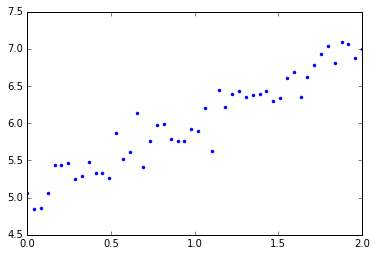

In [261]:
plt.plot(data[0], data[1], '.')

In [262]:
cov_matrix = np.cov(data)

Получим собственные векторы и возьмем один из них:

In [264]:
U, _, _ = sla.svd(cov_matrix)

In [265]:
U_reduced = U[:, :1]

Преобразуем наши данные:

In [289]:
Z = U_reduced.T.dot(data)[0]

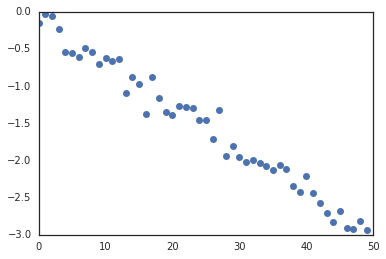

In [290]:
plt.plot(Z, 'o');

Теперь восстановим наши данные и сравним с оригинальными:

In [271]:
data_restored = U_red.dot(np.expand_dims(Z, 1).T)

In [272]:
data = data - np.expand_dims(data.min(axis=1), axis=1)
data_restored = data_restored - np.expand_dims(data_restored.min(axis=1), axis=1)

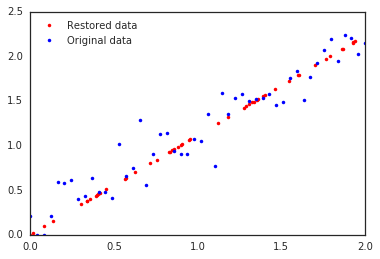

In [292]:
plt.plot(data_restored[0], data_restored[1], 'r.', label='Restored data');
plt.plot(data[0], data[1], 'b.', label='Original data')
plt.legend(loc='upper left')

### PCA помогает классификации

Исследуем [Iris Dataset](https://archive.ics.uci.edu/ml/datasets/iris) из `sklearn`.

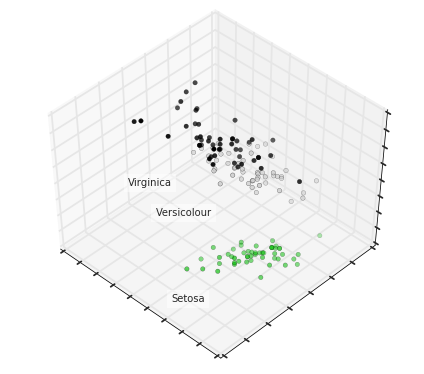

In [274]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='white')
%matplotlib inline
from sklearn import decomposition
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D

# Загрузим данные из sklearn
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Нарисуем данные в 3D
fig = plt.figure(1, figsize=(6, 5))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
    
# Поменяем порядок цветов меток, чтобы они соответствовали правильному
y_clr = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_clr, cmap=plt.cm.spectral)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([]);

Предскажем тип цветка по его параметрам с помощью неглубокого дерева решений.

In [282]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, 
                                                    stratify=y, 
                                                    random_state=41)

clf = DecisionTreeClassifier(max_depth=2, random_state=41)
clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)
print('Accuracy: {:.5f}'.format(accuracy_score(y_test, preds.argmax(axis=1))))

Accuracy: 0.91111


Применим PCA для визуализации:

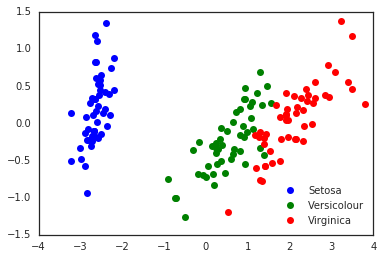

In [277]:
pca = decomposition.PCA(n_components=2)
X_centered = X - X.mean(axis=0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)

plt.plot(X_pca[y == 0, 0], X_pca[y == 0, 1], 'bo', label='Setosa')
plt.plot(X_pca[y == 1, 0], X_pca[y == 1, 1], 'go', label='Versicolour')
plt.plot(X_pca[y == 2, 0], X_pca[y == 2, 1], 'ro', label='Virginica')
plt.legend(loc=0);

Обучим классификатор на измененных данных:

In [281]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=.3, 
                                                    stratify=y, 
                                                    random_state=41)

clf = DecisionTreeClassifier(max_depth=2, random_state=41)
clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)
print('Accuracy: {:.5f}'.format(accuracy_score(y_test, preds.argmax(axis=1))))

Accuracy: 0.97778


### PCA помогает визуализации

Теперь поработаем с уже знакомым набором данных [MNIST](http://yann.lecun.com/exdb/mnist/).

In [283]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

Для начала, посмотрим на данные:

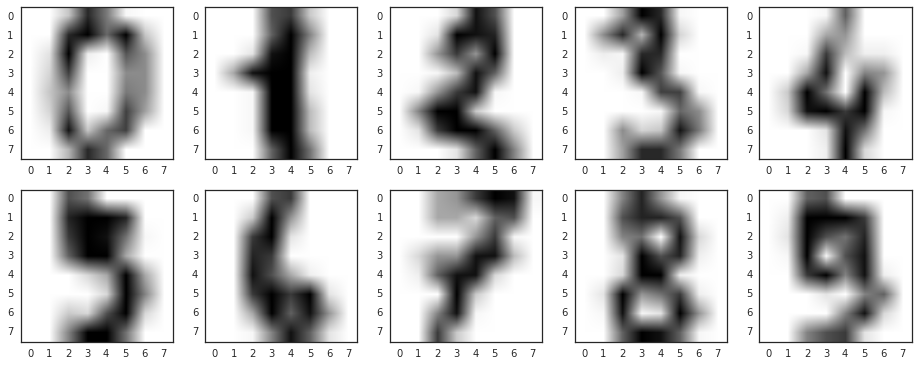

In [284]:
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([8,8]));

Каждый пиксель - это признак, поэтому размерность наших данных - 64.  
Уменьшим размерность до 2 и посмотрим, что получится.

Projecting 64D data to 2D


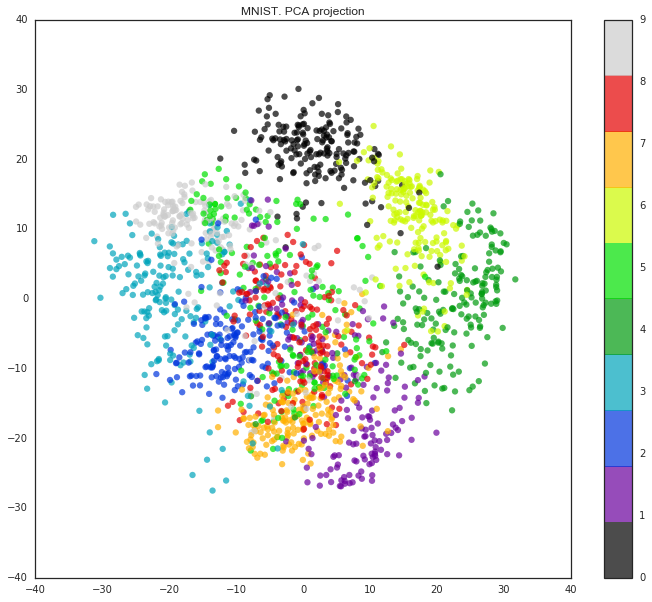

In [288]:
pca = decomposition.PCA(n_components=2)
X_reduced = pca.fit_transform(X)

print('Projecting {}D data to 2D'.format(X.shape[1]))

plt.figure(figsize=(12, 10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. PCA projection');